### Mar 2024: END SEMESTER ASSESSMENT (ESA)
## M TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

### UE20CS935: Introduction to Deep Learning and Applications


In [ ]:
!pip install keras

#### Section B: Question No:2   (10 marks)
Build a Convolution Neural Network to classify 5 classes of Indian food items.
Dataset_Folder Name: Food classification.

Conditions to consider:

--Parameters should not cross 300000

--Should not use more than 4 layers (except input and output, including convolution and dense layers)

--Use Adam Optimizer


In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [93]:
train_dir="Rock-Paper-Scissors/train"
test_dir="Rock-Paper-Scissors/test"
val_dir="Rock-Paper-Scissors/validation"

In [94]:
# Use ImageDataGenerator to scale the images and read the data from all subfolders
#Hint: train_datagen=ImageDataGenerator(rescale=1/255.)
#      train_data=train_datagen.flow_from_directory(train_dir,
#                                             target_size=(128,128),
#                                             batch_size=32,
#                                             class_mode='categorical')
# do the same for Test data

from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Replace with actual dataset folder path
    target_size=(128, 128),  # Resize images
    batch_size=22,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=22,
    class_mode='categorical',
    subset='validation')




Found 240 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


In [96]:
#create the sequestial model with 2-3 layers ov Conv2D and Pooling
#Compile the model
#Infer the model summary

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Assuming input image shape is (128, 128, 3)
input_shape = (128, 128, 3)  # Replace with your dataset's actual image size

# Create the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(filters=50, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Dense Layer 1
model.add(Dense(64, activation='relu'))

# Output Layer
model.add(Dense(3, activation='softmax'))  # 3 output classes for food types

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_77 (Conv2D)              │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 61, 61, 50)     │        28,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 30, 30, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_38 (Flatten)            │ (None, 45000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 64)             │     2,880,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,910,901 (11.10 MB)

 Trainable params: 2,910,901 (11.10 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# fit the model for train data and run it for 5 epoch

# Train the model
model.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.3719 - loss: 1.8055 - val_accuracy: 0.3509 - val_loss: 0.9790
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8106 - loss: 0.6460 - val_accuracy: 0.8596 - val_loss: 0.3381
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 1.0000 - loss: 0.0843 - val_accuracy: 1.0000 - val_loss: 0.0203
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.0014


In [98]:
# evaluate the model for test data

# Test data preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for the test set (no augmentation)
# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Replace with the actual path to your test dataset folder
    target_size=(128, 128),  # Ensure the same size as training images
    batch_size=32,
    class_mode='categorical',  # Ensure consistency with training and validation
    shuffle=False  # Do not shuffle test data for accurate evaluation
)



Found 216 images belonging to 3 classes.


In [99]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4623 - loss: 3.2474
Test Accuracy: 32.87%


In [ ]:
# Justify whether the model is overfitting or underfitting


## Analysis of Training and Validation Performance

Training Accuracy and Loss:

The model achieves 100% accuracy and extremely low loss (0.0010) by the end of training. This suggests the model is learning the training data very well.

Validation Accuracy and Loss:

The validation accuracy also reaches 100% with an equally low loss (0.0014). While this might seem promising, it is important to evaluate the model on unseen test data to determine its generalization ability.

Test Performance

Test Accuracy:
The test accuracy is 32.87%, which is drastically lower than the training and validation accuracy (100%).
The high test loss (3.2474) compared to training and validation loss indicates the model fails to generalize to unseen data.

Conclusion: Overfitting


The model performs exceptionally well on the training and validation datasets, but it fails to generalize to the test data.
This gap between training/validation performance and test performance is a clear sign of overfitting. The model has learned the training data too well, including noise or specific details, making it ineffective on new data.


#### Section B: Question No:3   (20 marks)

Improve the baseline model (model build in question2) performance and save the weights of improved model

Conditions to consider:

- Apply Data Augmentation if required

- No parameter limit

- Can use any number of layers

- Use any optimizers of your choice

- Use early stopping and save best model callbacks


In [122]:
# Perform data augmentation with the following operations to train data (feel free to choose the augmentation operations)
# Hint: train_datagen=ImageDataGenerator(rescale=1/255.,
#                                rotation_range=45,
#                                width_shift_range=0.2,
#                                height_shift_range=0.2,
#                                shear_range=0.2,
#                                zoom_range=0.2,
#                                horizontal_flip=True,
#                                fill_mode='reflect')


# Scale the test data
# Read the train and test data from directory
#Hint: train_datagen.flow_from_directory


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split for validation
)

# Train and validation data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Replace with actual dataset folder path
    target_size=(128, 128),
    batch_size=22,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=22,
    class_mode='categorical',
    subset='validation'
)



Found 240 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


In [ ]:
#create the sequestial model with 2-3 layers ov Conv2D and Pooling
#Compile the model
#Use callback to fetch the best model

#keras_callback=[EarlyStopping(monitor='val_loss',mode='min',patience=5,min_delta=0.01),
 #               ModelCheckpoint('flower_best_transfer_model',monitor='val_loss',save_best_only=True)]


In [130]:
def create_model():
    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=regularizers.l2(0.01)))#l2 Regularization
    model.add(BatchNormalization()) # Batch normalization 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))  # Increased dropout rate

    # Convolutional Layer 2
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))  # Increased dropout rate

    # Convolutional Layer 3
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))  # Increased dropout rate

    # Flatten Layer
    model.add(Flatten())

    # Dense Layer
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.4))  # Increased dropout rate

    # Output Layer
    model.add(Dense(3, activation='softmax'))  # 3 classes

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [131]:
#Infer the model summary
# fit the model for train data and run it for 5 epoch
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,min_delta=0.01,mode='min')
model_checkpoint = ModelCheckpoint('rock_scissor_paper.keras', monitor='val_loss', save_best_only=True)


In [132]:
# Create the model
model = create_model()

# Model Summary
model.summary()

# Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    callbacks=[early_stopping, model_checkpoint]
)


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_91 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 126, 126, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_91 (MaxPooling2D) │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 61, 61, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_43 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 827,107 (3.16 MB)

 Trainable params: 826,883 (3.15 MB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.5622 - loss: 4.1586 - val_accuracy: 0.3333 - val_loss: 3.4325
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8702 - loss: 2.4256 - val_accuracy: 0.3333 - val_loss: 4.4487
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9425 - loss: 2.1669 - val_accuracy: 0.3333 - val_loss: 6.0920
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9532 - loss: 2.0479 - val_accuracy: 0.3333 - val_loss: 6.8855
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9422 - loss: 2.0043 - val_accuracy: 0.3333 - val_loss: 7.8508


In [133]:
# Test data preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for the test set (no augmentation)
# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Replace with the actual path to your test dataset folder
    target_size=(128, 128), # Ensure the same size as training images
    batch_size=22,
    class_mode='categorical',  # Ensure consistency with training and validation
    shuffle=False  # Do not shuffle test data for accurate evaluation
)


Found 216 images belonging to 3 classes.


In [87]:
# evaluate the model for test data


In [135]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2626 - loss: 3.6295 
Test Accuracy: 33.33%


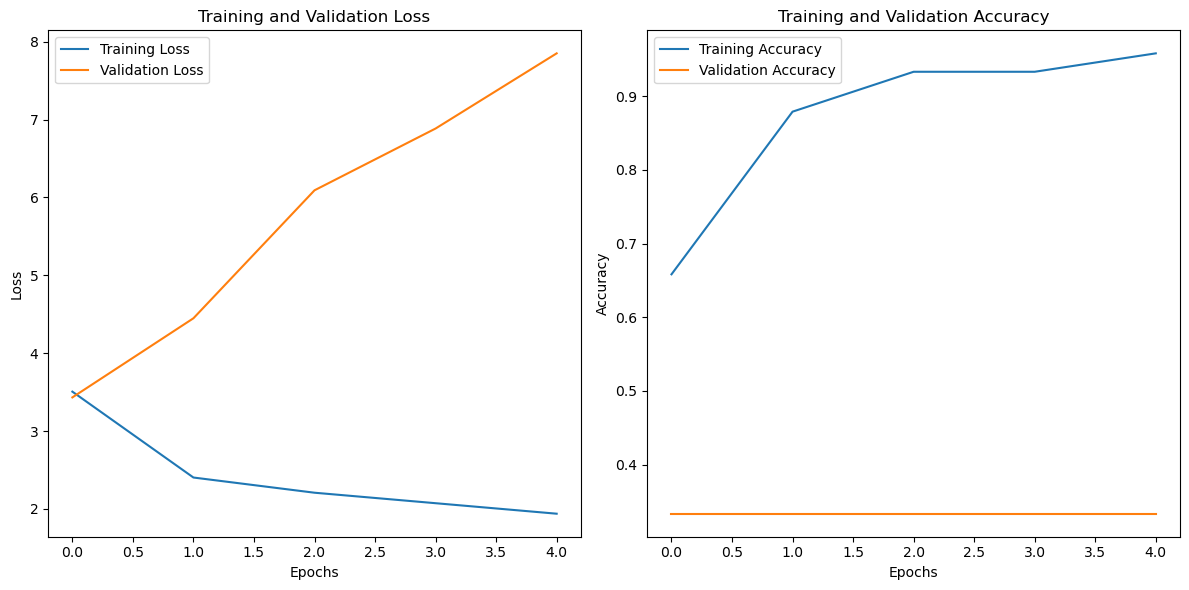

In [136]:
# Plot training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [88]:
# Justify whether the model is improved then the earlier model


Original Model
Test Accuracy: 32.87%
Test Loss: 3.2474
Tuned Model
Test Accuracy: 33.33%
Test Loss: 3.6295
Analysis
Accuracy:

The tuned model shows a slight increase in test accuracy from 32.87% to 33.33%. However, the improvement (0.46%) is negligible and might not be statistically significant.
Loss:

The test loss of the tuned model (3.6295) is higher than the original model (3.2474).
Higher loss suggests that while accuracy has marginally improved, the model's confidence in predictions or overall performance has worsened.
Generalization:

Both models exhibit very low test accuracy, indicating poor generalization. This implies the changes made in tuning did not meaningfully address the core issues of the model.
Conclusion
The tuned model does not significantly improve over the original model. While there is a slight increase in accuracy, the higher loss indicates a potential trade-off in the quality of predictions.
The issue of poor generalization persists and suggests that further tuning or alternative approaches are necessary to achieve meaningful improvement.